## 🧪 Projeto – Bagging Classificação

Uma **EdTech** possui uma plataforma de vendas para oferta de seus produtos de educação e, com o objetivo de priorizar melhor suas ações comerciais, quer desenvolver uma estratégia para **📈 ampliar seu fator de conversão de leads** em vendas.

📊 Atualmente, as informações referentes a esse processo de vendas encontram-se em uma **ferramenta de CRM**, da qual podem ser extraídos alguns insights.

🔍 Desta forma, para apoiar no desenvolvimento dessa estratégia, iremos trabalhar com um **algoritmo de classificação** que possa **prever se um lead será ou não convertido em venda**.

✅ Dado o volume de dados e as features disponíveis, adotaremos o **método Bagging de ensemble**, usando **algoritmos supervisionados de classificação**.

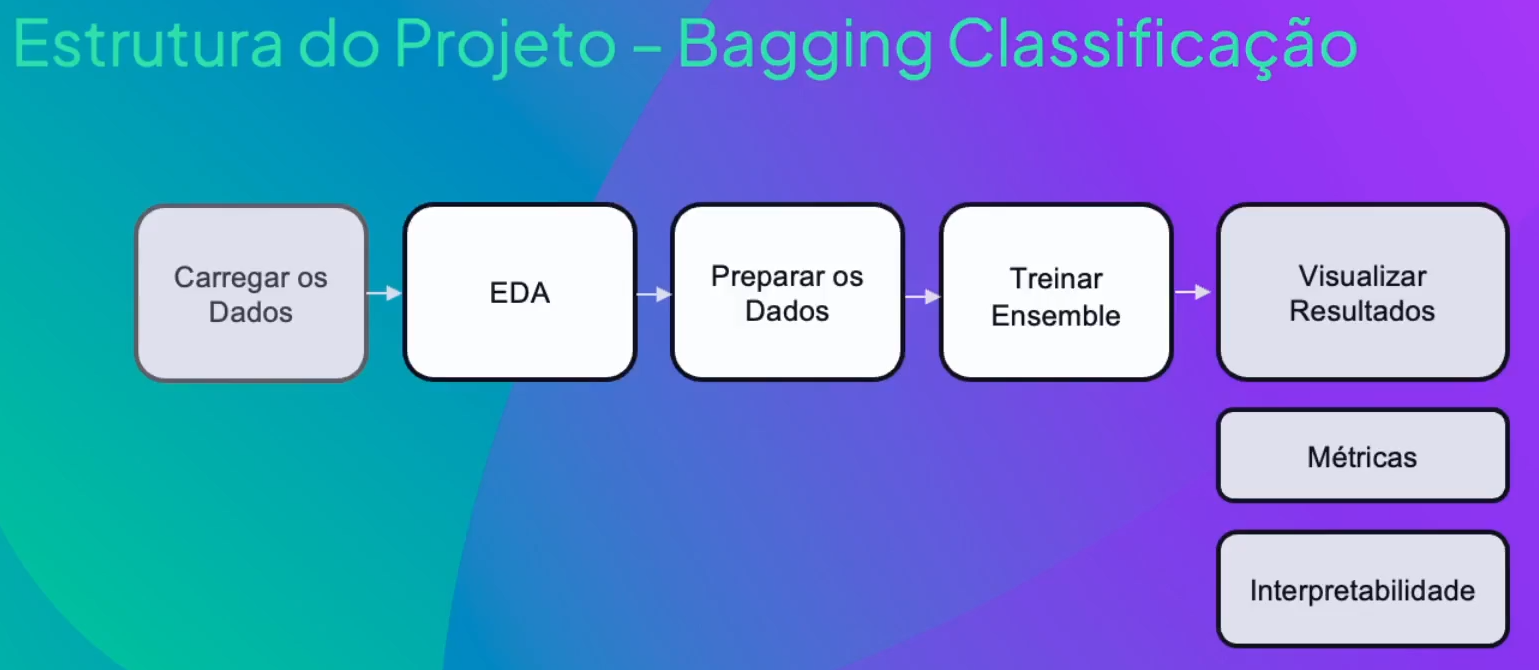

In [2]:
# Importar as bibliotecas

# EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy.stats import chi2_contingency

sns.set_style('whitegrid')

# ML
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Carregar os Dados

In [3]:
# Carregar os dados
df_leads = pd.read_csv('./datasets/leads.csv')

In [7]:
# Mostrar as primeiras linhas
df_leads.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [8]:
# Mostrar as ultimas linhas
df_leads.tail(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9230,d11c15b7-8056-45a6-8954-771c0d0495fe,579701,Landing Page Submission,Google,No,No,0,2.0,870,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,No,Email Opened
9231,4aeae36b-2b57-494f-bdab-dd58844286b4,579697,Landing Page Submission,Google,No,No,1,8.0,1016,4.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,20.0,No,No,Email Opened
9232,2d0109e9-dfb2-4664-83de-c2ea75ec7516,579642,Landing Page Submission,Direct Traffic,No,No,0,2.0,1770,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,SMS Sent
9233,3f715465-2546-47cd-afa8-8b8dc63b8b43,579622,API,Direct Traffic,No,No,1,13.0,1409,2.60,...,No,Select,Select,NaN,NaN,NaN,NaN,No,No,SMS Sent
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.50,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [47]:
# Mostrar a estrutura do dataset
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Do Not Call                             9074 non-null   int64  
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Search                                  9074 non-null   int64  
 10  Newspaper Article                       9074 non-null   int64  
 

### Feature Engineering e Data Cleaning

In [11]:
# Remover as colunas Prospect ID e Lead Number
df_leads.drop(columns=['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [13]:
# Mostrar e remover as colunas categoricas que possuem somente um valor possivel
for column in df_leads.select_dtypes(include=['object']).columns:
    if df_leads[column].nunique() == 1:
        print(f'Coluna {column} possui somente um valor possível: {df_leads[column].unique()}')
        df_leads.drop(columns=[column], axis=1, inplace=True)

Coluna Magazine possui somente um valor possível: ['No']
Coluna Receive More Updates About Our Courses possui somente um valor possível: ['No']
Coluna Update me on Supply Chain Content possui somente um valor possível: ['No']
Coluna Get updates on DM Content possui somente um valor possível: ['No']
Coluna I agree to pay the amount through cheque possui somente um valor possível: ['No']


In [22]:
# Mostrar os valores possiveis para todas as colunas categoricas
for column in df_leads.select_dtypes(include=['object']).columns:
    print(f'Coluna {column}:Valores possíveis = {df_leads[column].unique()}')

Coluna Lead Origin:Valores possíveis = ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Coluna Lead Source:Valores possíveis = ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'Facebook' nan 'blog' 'Pay per Click Ads'
 'bing' 'Social Media' 'WeLearn' 'Click2call' 'Live Chat'
 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release' 'NC_EDM']
Coluna Do Not Email:Valores possíveis = ['No' 'Yes']
Coluna Do Not Call:Valores possíveis = ['No' 'Yes']
Coluna Last Activity:Valores possíveis = ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
Coluna Search:Valores possíveis = ['No' 'Y

In [17]:
# Mostrar o percentual de valores ausentes ou com valor igual a 'Select' para cada coluna categorica
for column in df_leads.select_dtypes(include=['object']).columns:
    contagem_nulas = (df_leads[column]=='Select').sum() + df_leads[column].isnull().sum()
    print(f'{column}: {contagem_nulas / len(df_leads) * 100:.2f}%')

Lead Origin: 0.00%
Lead Source: 0.39%
Do Not Email: 0.00%
Do Not Call: 0.00%
Last Activity: 1.11%
Country: 26.63%
Specialization: 36.58%
How did you hear about X Education: 78.46%
What is your current occupation: 29.11%
What matters most to you in choosing a course: 29.32%
Search: 0.00%
Newspaper Article: 0.00%
X Education Forums: 0.00%
Newspaper: 0.00%
Digital Advertisement: 0.00%
Through Recommendations: 0.00%
Tags: 36.29%
Lead Quality: 51.59%
Lead Profile: 74.19%
City: 39.71%
Asymmetrique Activity Index: 45.65%
Asymmetrique Profile Index: 45.65%
A free copy of Mastering The Interview: 0.00%
Last Notable Activity: 0.00%


In [18]:
# Remover colunas categoricas cujo percentual de valores ausentes ou com valor igual a 'Select' seja maior que 25%
for column in df_leads.select_dtypes(include=['object']).columns:
    contagem_nulas = (df_leads[column]=='Select').sum() + df_leads[column].isnull().sum()
    if (contagem_nulas / len(df_leads) * 100) > 25:
        print(f'{column}: {contagem_nulas / len(df_leads) * 100:.2f}%')
        df_leads.drop(columns=[column], axis=1, inplace=True)

Country: 26.63%
Specialization: 36.58%
How did you hear about X Education: 78.46%
What is your current occupation: 29.11%
What matters most to you in choosing a course: 29.32%
Tags: 36.29%
Lead Quality: 51.59%
Lead Profile: 74.19%
City: 39.71%
Asymmetrique Activity Index: 45.65%
Asymmetrique Profile Index: 45.65%


In [21]:
# Na coluna Lead Source, substituir o valor 'google' por 'Google'
df_leads['Lead Source'] = df_leads['Lead Source'].apply(lambda x: 'Google' if x == 'google' else x)

In [24]:
# Converter valores de colunas categoricas de Yes/No para 1/0
for column in df_leads.select_dtypes(include=['object']).columns:
    valores_unicos = df_leads[column].unique()
    if set(valores_unicos).issubset(set(['Yes', 'No'])):
        print(f'{column}')
        df_leads[column] = df_leads[column].apply(lambda x: 1 if x == 'Yes' else 0)

Do Not Email
Do Not Call
Search
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
A free copy of Mastering The Interview


In [26]:
# Remover linhas com valores ausentes em colunas categoricas
colunas_categoricas = df_leads.select_dtypes(include=['object']).columns
df_leads.dropna(subset=colunas_categoricas, inplace=True)

In [28]:
# Apresentar estatisticas descritivas
df_leads.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview
count,9103.000000,9103.000000,9103.000000,9074.000000,9103.000000,9074.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,4944.000000,4944.000000,9103.000000
mean,0.079205,0.000220,0.379216,3.456028,483.773921,2.370151,0.001538,0.000220,0.000110,0.000110,0.000439,0.000769,14.313511,16.340210,0.317258
std,0.270073,0.014822,0.485219,4.858802,545.519186,2.160871,0.039189,0.014822,0.010481,0.010481,0.020959,0.027721,1.394627,1.807428,0.465434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,15.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,247.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,16.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,924.000000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,18.000000,1.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,20.000000,1.000000


In [29]:
# Mostrar e remover as colunas numericas que possuem somente um valor possivel
for column in df_leads.select_dtypes(include=['number']).columns:
    if df_leads[column].nunique() == 1:
        print(f'Coluna {column} possui somente um valor possível: {df_leads[column].unique()}')
        df_leads.drop(columns=[column], axis=1, inplace=True)

In [30]:
# Mostrar o percentual de valores ausentes para cada coluna numerica
for column in df_leads.select_dtypes(include=['number']).columns:
    contagem_nulas = df_leads[column].isnull().sum()
    print(f'{column}: {contagem_nulas / len(df_leads) * 100:.2f}%')

Do Not Email: 0.00%
Do Not Call: 0.00%
Converted: 0.00%
TotalVisits: 0.32%
Total Time Spent on Website: 0.00%
Page Views Per Visit: 0.32%
Search: 0.00%
Newspaper Article: 0.00%
X Education Forums: 0.00%
Newspaper: 0.00%
Digital Advertisement: 0.00%
Through Recommendations: 0.00%
Asymmetrique Activity Score: 45.69%
Asymmetrique Profile Score: 45.69%
A free copy of Mastering The Interview: 0.00%


In [31]:
# Remover colunas numericas cujo percentual de valores ausentes seja maior que 25%
for column in df_leads.select_dtypes(include=['number']).columns:
    contagem_nulas = df_leads[column].isnull().sum()
    if (contagem_nulas / len(df_leads) * 100) > 25:
        print(f'{column}: {contagem_nulas / len(df_leads) * 100:.2f}%')
        df_leads.drop(columns=[column], axis=1, inplace=True)

Asymmetrique Activity Score: 45.69%
Asymmetrique Profile Score: 45.69%


In [33]:
# Remover linhas com valores ausentes em colunas numericas
colunas_numericas = df_leads.select_dtypes(include=['number']).columns
df_leads.dropna(subset=colunas_numericas, inplace=True)

### EDA

Hit Ratio
- Razão entre leads convertidos em vendas sobre quantidade total de leads (Conceito 1)
    100 leads criados e 30 foram foram convertidas = 30%
- Razão entre leads convertidos em vendas sobre quantidade de leads encerrados (Conceito 2)
    100 leads criados, 20 leads que não foram convertidos e 20 leads que foram convertidos = 50%

In [35]:
# Distribuicao da variavel target em percentual
fig = px.bar(df_leads['Converted'].value_counts() / len(df_leads) * 100,
             title='Hit Ratio - Fator de Conversão',
             labels={'index': 'Converted', 'value': 'Percentual'},
             opacity=0.8
             )

fig.update_layout(showlegend=False)
fig.show()

In [36]:
# Matriz de correlacao das variaveis numericas com Plotly Go
corr_matrix = df_leads.select_dtypes(include=['number']).corr()

In [40]:
# Plot de correlacao
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x= corr_matrix.columns,
        y = corr_matrix.index,
        z = np.array(corr_matrix),
        text = corr_matrix.values,
        texttemplate='%{text:.2f}',
        colorscale=px.colors.diverging.RdBu,
        zmin=-1,
        zmax=1
    )
)

fig.show()

In [41]:
# BoxPlot Converted x TotalVisits
fig = px.box(df_leads, x='Converted', y='TotalVisits', color='Converted')
fig.show()

In [42]:
# BoxPlot Converted x TotalTimeSpent
fig = px.box(df_leads, x='Converted', y='Total Time Spent on Website', color='Converted')
fig.show()

In [43]:
# BoxPlot Converted x PageViewsPerVisit
fig = px.box(df_leads, x='Converted', y='Page Views Per Visit', color='Converted')
fig.show()

In [44]:
# Criar uma tabela de contingencia de Converted x Lead Source
contingency_table_lead_source = pd.crosstab(df_leads['Converted'], df_leads['Lead Source'])

In [45]:
# Mostrar a tabela de contingencia
contingency_table_lead_source

Lead Source,Click2call,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,testone,welearnblog_Home,youtubechannel
Converted,,,,,,,,,,,,,,,,,,,,
0,1,1725,22,1726,0,0,1305,718,1,2,33,94,1,0,2,5,1,1,1,1
1,3,818,9,1147,2,1,448,436,0,0,410,31,1,1,127,1,0,0,0,0


In [46]:
# Executar o teste de independencia de qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table_lead_source)

# Mostrar o resultado
print(f'Estatística qui-quadrado: {chi2}')
print(f'Valor p: {p}')
print(f'Graus de Liberdade: {dof}')
print(f'Existe uma relação significativa entre Converted e Lead Source: {p < 0.05}')

Estatística qui-quadrado: 942.1372507753774
Valor p: 1.1748671316223743e-187
Graus de Liberdade: 19
Existe uma relação significativa entre Converted e Lead Source: True


In [48]:
# Criar uma tabela de contingencia de Converted x Lead Origin
contingency_table_lead_origin = pd.crosstab(df_leads['Converted'], df_leads['Lead Origin'])

In [49]:
# Mostrar a tabela de contingencia
contingency_table_lead_origin

Lead Origin,API,Landing Page Submission,Lead Add Form,Lead Import
Converted,,,,
0,2463,3118,37,21
1,1115,1767,544,9


In [50]:
# Executar o teste de independencia de qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table_lead_origin)

# Mostrar o resultado
print(f'Estatística qui-quadrado: {chi2}')
print(f'Valor p: {p}')
print(f'Graus de Liberdade: {dof}')
print(f'Existe uma relação significativa entre Converted e Lead Origin: {p < 0.05}')

Estatística qui-quadrado: 843.1212236836468
Valor p: 1.9228780932726904e-182
Graus de Liberdade: 3
Existe uma relação significativa entre Converted e Lead Origin: True


In [51]:
# Criar uma tabela de contingencia de Converted x Last Notable Activity
contingency_table_lna = pd.crosstab(df_leads['Converted'], df_leads['Last Notable Activity'])

In [52]:
# Mostrar a tabela de contingencia
contingency_table_lna

Last Notable Activity,Approached upfront,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
Converted,,,,,,,,,,,,,,,,
0,0,51,128,0,1781,0,1,1,2587,158,225,0,663,10,33,1
1,1,9,45,2,1042,1,0,13,680,25,93,1,1489,22,12,0


In [53]:
# Executar o teste de independencia de qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table_lna)

# Mostrar o resultado
print(f'Estatística qui-quadrado: {chi2}')
print(f'Valor p: {p}')
print(f'Graus de Liberdade: {dof}')
print(f'Existe uma relação significativa entre Converted e Last Notable Activity: {p < 0.05}')

Estatística qui-quadrado: 1424.6171966295433
Valor p: 8.365508263958168e-295
Graus de Liberdade: 15
Existe uma relação significativa entre Converted e Last Notable Activity: True


### Preparação dos dados

In [54]:
# Preparar os dados para o modelo
X = df_leads.drop(columns=['Converted'])
y = df_leads['Converted']

In [55]:
# Criar Column Transformer para normalizar numéricas e One-Hot Encoding nas categoricas
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [57]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

# Aplicar Column Transformer
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [58]:
# Mostrar os conjuntos
print(X_train.shape)
print(X_test.shape)

(7259, 68)
(1815, 68)


### Treinamento do Modelo

In [128]:
# Criar o modelo de BaggingClassifier
bagging_model = BaggingClassifier(
    estimator=LogisticRegression(),
    n_estimators=10,
    random_state=51,
    max_samples=0.3
)

In [129]:
# Treinar o modelo
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=LogisticRegression(), max_samples=0.3,
                  random_state=51)

### Avaliação do Modelo

In [130]:
# Fazer predicoes no conjunto de testes
y_pred = bagging_model.predict(X_test)

In [131]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [132]:
# Mostrar resultados
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Acurácia: 0.7966942148760331
Precisão: 0.7439222042139384
Recall: 0.6850746268656717
F1-Score: 0.7132867132867133


In [133]:
# Mostrar uma matriz de confusao em Plotly
conf_matrix = confusion_matrix(y_test, y_pred)

fig = px.imshow(conf_matrix,
                labels=dict(x='Predição', y='Real', color='Contagem'),
                x=['Not Converted', 'Converted'],
                y=['Not Converted', 'Converted'],
                color_continuous_scale='Viridis')

fig.update_traces(text=conf_matrix, texttemplate='%{z}')
fig.update_layout(coloraxis_showscale=False)

fig.show()

In [134]:
# Calcular a importancia das variaveis
importances = np.mean([np.abs(estimator.coef_[0]) for estimator in bagging_model.estimators_], axis=0)

In [135]:
# Obter os nomes das features apos o preprocessor
feature_names = (numeric_features.tolist() +
                 preprocessor.named_transformers_['cat']
                 .get_feature_names_out(categorical_features).tolist())

In [136]:
# Criar um dataframe combinando nomes das features e as importancias
df_feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [137]:
# Ordenar o dataframe por importancia
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=True)

In [138]:
# Plotar a importancia das features
fig = px.bar(df_feature_importances,
             x='Importance',
             y='Feature',
             orientation='h',
             title='Importancia das Features (com base nos coeficientes absolutos)'
)

fig.update_layout(height=1280, width=1000, yaxis={'categoryorder': 'total ascending'})

### Some more things

In [139]:
bagging_model.estimators_samples_

[array([6647, 2395, 3964, ..., 5215, 2295,  480], dtype=int32),
 array([ 914, 6214, 4940, ...,  111, 6462, 2927], dtype=int32),
 array([6067, 5889, 4247, ..., 5093,  220, 6752], dtype=int32),
 array([ 405, 6461, 1538, ..., 2355, 1434, 5213], dtype=int32),
 array([3226, 4034, 4872, ...,  587, 5567, 4657], dtype=int32),
 array([ 514, 5133, 4920, ...,  875, 2517, 4289], dtype=int32),
 array([1246, 4026, 3914, ..., 4783, 6331, 5514], dtype=int32),
 array([2697, 5933, 5075, ..., 6534, 6185, 1294], dtype=int32),
 array([5528, 2923, 4766, ..., 4374, 5266, 5433], dtype=int32),
 array([5310, 3010, 5471, ..., 6499, 4345,  694], dtype=int32)]

In [140]:
bagging_model.estimators_samples_[1].shape

(2177,)

In [141]:
bagging_model.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
      

In [142]:
# Predizer Probabilidade de Conversao
y_pred_prob = bagging_model.predict_proba(X_test)

In [143]:
y_pred_prob

array([[0.13475509, 0.86524491],
       [0.7289265 , 0.2710735 ],
       [0.7289265 , 0.2710735 ],
       ...,
       [0.90134097, 0.09865903],
       [0.98484812, 0.01515188],
       [0.02900959, 0.97099041]])

### Cenário de CRM - Utilidade da Probabilidade

#### 📊 CRM

- **Leads concluídos** – Resultado Positivo ou Negativo  
- **Leads em aberto** – Não tenho Resultado

💡 Treine um modelo no que está concluído, para que ele generalize bem no que está em aberto.

---

#### 📈 Lead em aberto

##### 🔮 Probabilidade de Converter
- Quando **muito alto**, podemos olhar com mais foco pra realmente converter.
- Quando **muito baixo**, podemos meio que descartar.

##### 🧠 + Importância das Features

### Salvar dados e pre-processador do modelo

In [144]:
# Salvar dataframe como CSV
df_leads.to_csv('./datasets/leads_cleaned.csv', index=False)

# Salvar o preprocessor
import joblib

joblib.dump(preprocessor, './preprocessor_dataset_leads.pkl')

['./preprocessor_dataset_leads.pkl']